# 01 - Explore Datasets

In [1]:
import json

import pandas as pd
import matplotlib.pyplot as plt

pd.set_option('display.max_colwidth', None)

DATA_DIR = 'data/'

## Sequence Classification - Monitors

In [2]:
# load the data and combine them into one dataframe
csv_files = ['monitors_classification_202107_train.csv', 'monitors_classification_202107_val.csv',
             'monitors_classification_202107_test.csv']
_dfs = []
for filename in csv_files:
    _df = pd.read_csv(DATA_DIR + filename)
    _df['split'] = filename.replace('.csv', '').split('_')[-1]
    _dfs.append(_df)
clf_df = pd.concat(_dfs)

# decode metadata from string to dictionary
clf_df['metadata'] = clf_df['metadata'].apply(lambda x: json.loads(x.replace('\'', '"')))
clf_df['region'] = clf_df['metadata'].apply(lambda d: d.get('Region', 'N/A'))
clf_df['country'] = clf_df['metadata'].apply(lambda d: d.get('Country', 'N/A'))
clf_df = clf_df.drop(columns=['metadata'])
clf_df.head(10)

,inp,trg,split,region,country
0,32 inch curved screen 144hz monitor 1k 2k 4k fhd ips curved lcd pc hd-mi power vga cable,Noise,train,APeJC,Philippines
1,monitor samsung s34j550wqu 34'' ultra wqhd,Monitor,train,Western Europe,Spain
2,"телевизор samsung 50q60a, 50"" (125 см), smart, 4k ultra hd, qled",Tv,train,Central & Eastern Europe,Bulgaria
3,màn hình lcd 27in samsung s27b240,Noise,train,APeJC,Vietnam
4,philips 279c9/00,Monitor,train,Central & Eastern Europe,Hungary
5,sharp nec - mfg-rfb nec 24in fhd monitor ips panel,Monitor,train,USA,USA
6,monitorius iiyama xub2493hsu-b1,Monitor,train,Central & Eastern Europe,Lithuania
7,"portable monitor, corprit 15.6"" 1080p portable usb c external monitor for laptop, ultra slim vesa hdmi portable second/dual/side monitor for mac pc, portable gaming monitor display for phone xbox ps4",Noise,train,Middle East & Africa,United Arab Emirates
8,monitor lcd 24 nec e241n full hd ips boxe negru,Monitor,train,Central & Eastern Europe,Romania
9,"aoc c32g1 31.5"" 144hz curved gaming monitor with free aoc agon gaming mousepad",Monitor,train,APeJC,Philippines


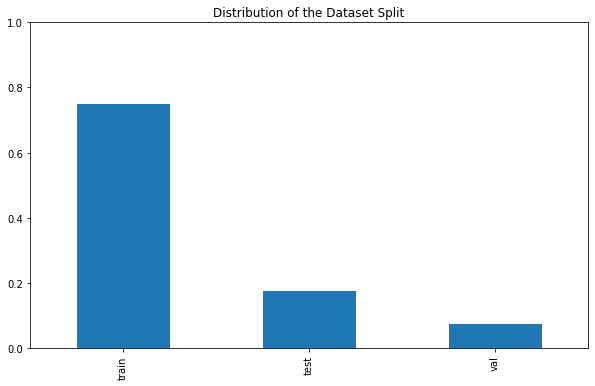

In [3]:
ax = (clf_df['split'].value_counts() / len(clf_df)).plot(kind='bar', figsize=(10, 6))
ax.set(title='Distribution of the Dataset Split', ylim=[0, 1])
plt.show()

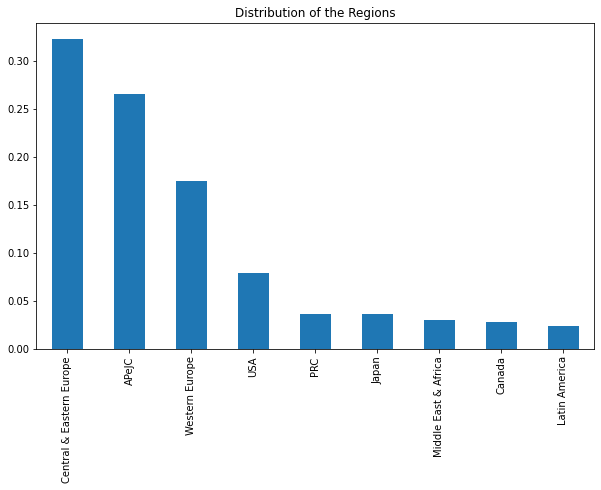

In [4]:
ax = (clf_df['region'].value_counts() / len(clf_df)).plot(kind='bar', figsize=(10, 6))
ax.set(title='Distribution of the Regions')
plt.show()

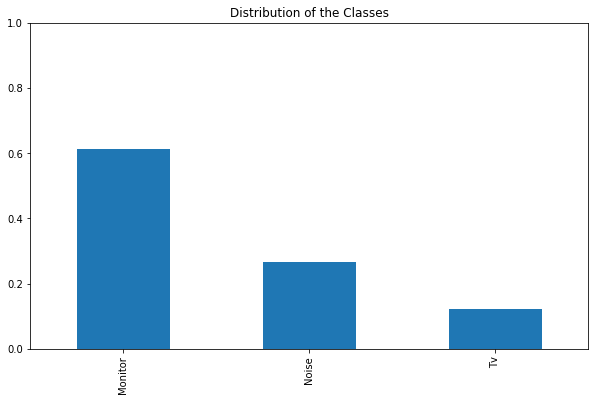

In [5]:
ax = (clf_df['trg'].value_counts() / len(clf_df)).plot(kind='bar', figsize=(10, 6))
ax.set(title='Distribution of the Classes', ylim=[0, 1])
plt.show()

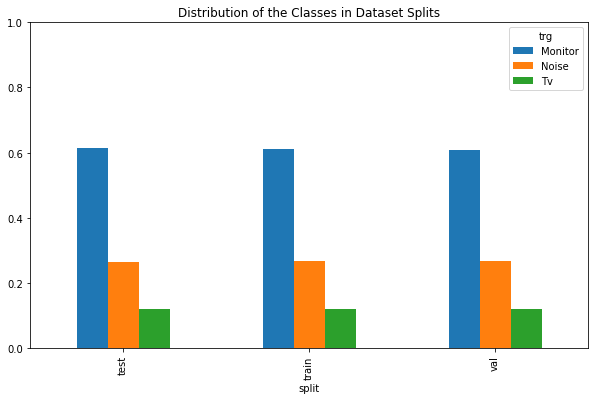

In [6]:
_df = clf_df.groupby(['split']).apply(lambda g: g['trg'].value_counts() / len(g))
ax = _df.plot(kind='bar', figsize=(10, 6))
ax.set(title='Distribution of the Classes in Dataset Splits', ylim=[0, 1])
plt.show()

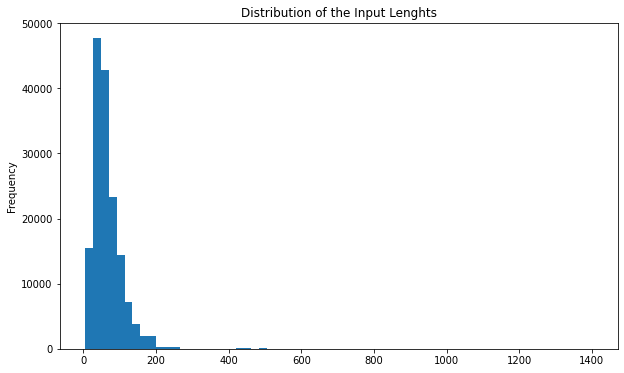

Max Input Length: 1401.0


In [7]:
ax = clf_df['inp'].str.len().plot(kind='hist', bins=64, figsize=(10, 6))
ax.set(title='Distribution of the Input Lenghts')
plt.show()

print('Max Input Length:', clf_df['inp'].str.len().max())

## Sequence Translation - Monitors and Printers

In [9]:
# load the data and combine them into one dataframe
csv_files = ['monitors_translation_202107_train.csv', 'monitors_translation_202107_val.csv',
             'monitors_translation_202107_test.csv', 'printers_translation_202107_train.csv',
             'printers_translation_202107_val.csv', 'printers_translation_202107_test.csv']
_dfs = []
for filename in csv_files:
    _df = pd.read_csv(DATA_DIR + filename)
    _df['split'] = filename.replace('.csv', '').split('_')[-1]
    _df['type'] = filename.split('_')[0]
    _dfs.append(_df)
trans_df = pd.concat(_dfs)

# decode metadata from string to dictionary
trans_df['metadata'] = trans_df['metadata'].apply(lambda x: json.loads(x.replace('\'', '"')))
trans_df['region'] = trans_df['metadata'].apply(lambda d: d.get('Region', 'N/A'))
trans_df['country'] = trans_df['metadata'].apply(lambda d: d.get('Country', 'N/A'))
trans_df = trans_df.drop(columns=['metadata'])
trans_df.head(10)

,inp,trg,split,type,region,country
0,монитор игровой viewsonic vx3258-pc-mhd - характеристики,viewsonic | vx3258-pc-mhd,train,monitors,Central & Eastern Europe,Russia
1,"monitor viewsonic 24"" va2446mh-led 1920 x 1080 full hd (1080p)",viewsonic | va2446mh-led,train,monitors,Latin America,Chile
2,"monitorius philips 241b8qjeb/00 24'' fullhd, panel-ips",philips | 241b8qjeb,train,monitors,Central & Eastern Europe,Lithuania
3,io data lcd-mf223fb2-t,i.o data | lcd-mf223fb2-t,train,monitors,Japan,Japan
4,"monitor led aoc 24g2e 24"" ips 1080 144hz 1ms hdmi dp hdr 100x100mm",aoc | 24g2e,train,monitors,APeJC,Indonesia
5,asus/华硕vg27aqe/aq1a小金刚/vg249q电竞小钢炮 23.8英寸/27英寸电竞显示 vg249q-23.8英寸/144hz/内置音响,asus | vg27aqe,train,monitors,PRC,PRC
6,"19"" philips 19p4qyeb 19p4qyeb/00",philips | 19p4qyeb,train,monitors,Central & Eastern Europe,Czech Republic
7,eizo coloredge cg319x-bk,eizo | cg319x,train,monitors,Central & Eastern Europe,Poland
8,"asus proart pa278qv - led-skärm - 27"" - 2560 x 1440 wqhd - ips - 350 cd/m² - 1000:1 - 5 ms - hdmi, dvi-d, displayport, mini displayport - högtalare - svart",asus | pa278qv,train,monitors,Western Europe,Sweden
9,"asus rog swift pg248q esports gaming monitor, 24.0 inch fhd (1920x1080), 1ms response time, overclockable 180hz, g-sync support local",asus | pg248q,train,monitors,APeJC,Singapore


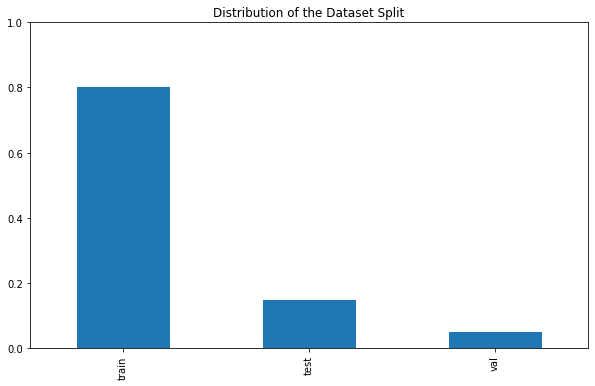

In [10]:
ax = (trans_df['split'].value_counts() / len(trans_df)).plot(kind='bar', figsize=(10, 6))
ax.set(title='Distribution of the Dataset Split', ylim=[0, 1])
plt.show()

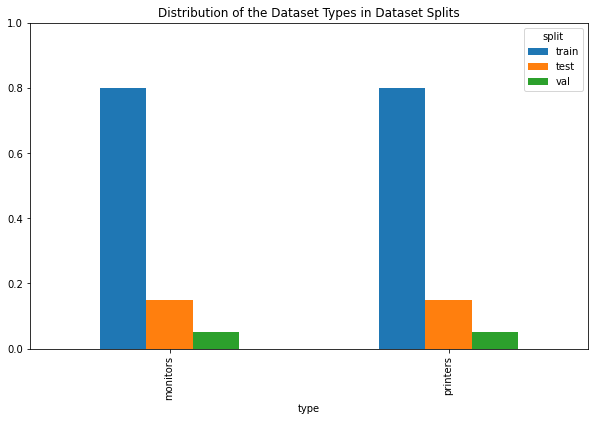

In [11]:
_df = trans_df.groupby(['type']).apply(lambda g: g['split'].value_counts() / len(g))
ax = _df.plot(kind='bar', figsize=(10, 6))
ax.set(title='Distribution of the Dataset Types in Dataset Splits', ylim=[0, 1])
plt.show()

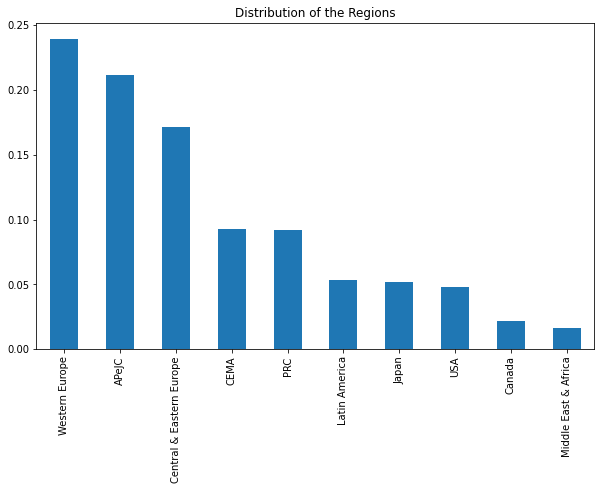

In [12]:
ax = (trans_df['region'].value_counts() / len(trans_df)).plot(kind='bar', figsize=(10, 6))
ax.set(title='Distribution of the Regions')
plt.show()

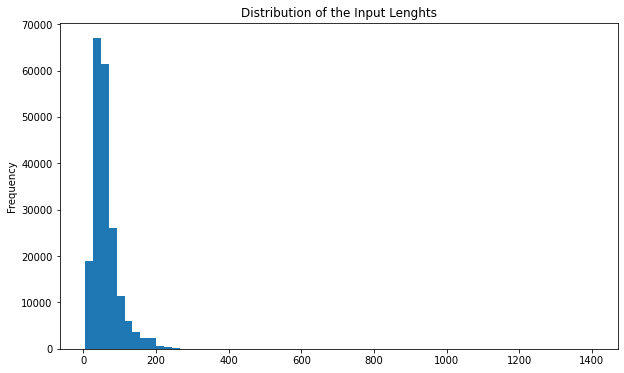

Max Input Length: 1401


In [13]:
ax = trans_df['inp'].str.len().plot(kind='hist', bins=64, figsize=(10, 6))
ax.set(title='Distribution of the Input Lenghts')
plt.show()

print('Max Input Length:', trans_df['inp'].str.len().max())

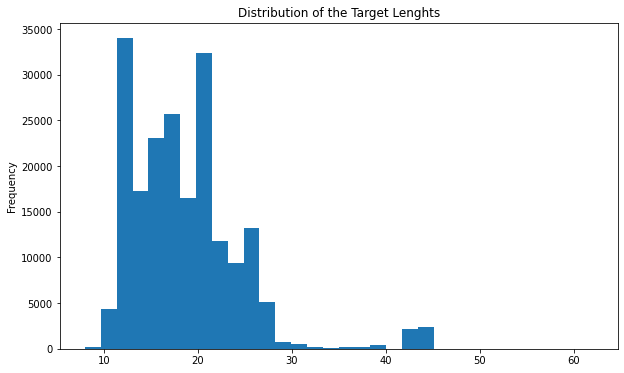

Max Target Length: 62


In [14]:
ax = trans_df['trg'].str.len().plot(kind='hist', bins=32, figsize=(10, 6))
ax.set(title='Distribution of the Target Lenghts')
plt.show()

print('Max Target Length:', trans_df['trg'].str.len().max())